In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
df = pd.read_csv('telco.csv')

In [84]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [27]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

## Expirimental Hypothesis

Telco can reduce customer churn by eliminating the Electronic Check payment option.  

## Analysis

First, lets look at the payment methods used by Telco customers that canceled their service. We are looking to see if there was a particular payment method associated with higher number of customers quiting their service. 

In [99]:
churny.value_counts()

Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: PaymentMethod, dtype: int64

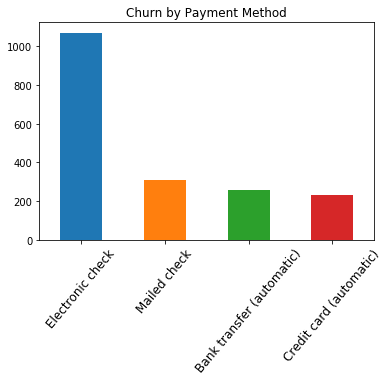

In [80]:
churny = df.loc[(df['Churn']=='Yes'), 'PaymentMethod']
churny.value_counts().plot(kind='bar')
plt.xticks(fontsize=12, rotation=50)
plt.title('Churn by Payment Method')
plt.show()

As we can see, of the customers that quit their Telco service, most of them used Electronic Check as their payment method. However, this could also be because most Telco customers use Electronic Check as their payment method. Let's take a look at the payment methods used by Telco customers regardless of whether they quit or not to see if this result is significant. 

In [96]:
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

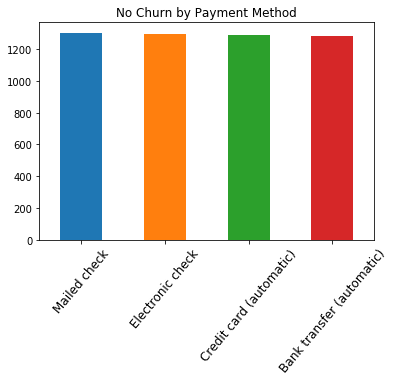

In [95]:
churnn = df.loc[(df['Churn']=='No'), 'PaymentMethod']
churnn.value_counts().plot(kind='bar')
plt.xticks(fontsize=12, rotation=50)
plt.title('No Churn by Payment Method')
plt.show()

It appears that Electronic Check is the most common payment method. But the numbers Churn numbers for Electronic Checks still seem high. Let's divide the the number of clients by payment method that quit by the total number of clients by payment method.

In [100]:
churny.value_counts()/df.PaymentMethod.value_counts()

Electronic check             0.452854
Mailed check                 0.191067
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Name: PaymentMethod, dtype: float64

As we can see, of the customers that use Electronic Check as their payment method, 45.2854% quit using Telco's services. This is a much higher churn rate than the customers who use other payment methods. Given this data, we should test my original Hypothesis, that eliminating Electronic Check as a form of payment will reduce customer churn. 

## Roll Out Plan

The plan is to take all the customers that currently use Electronic Check and split them into  2 sample groups with roughly the same customer makeup. Try to make each group have an equal number of Paperless billing as the other group. This will be an A/B test where group A continues using Electronic Check and group B will have to switch to another payment method. 

Allow group A to continue to pay using Electronic Check. Inform Group B that the will need to switch to another payment option as Telco will no longer be accepting Electronic Checks. Given that informing Group B that they may need to switch payment methods may cause a number of Group B to quit Telco services, only record the customers that successfully switch to another payment method. Do not record the Group B members that quit Telco services upon having to switch to another payment method towards Group B churn. The experiment should run for 6 months, recording the churn rates in Group A and B. 


## Evaluation Plan

After Group A and B are established, record the number of customers that discontinue their service at the end of each month for a 6 month period. Also note, that if members from Group A decide to switch their payment method from Electronic Check to another payment option during the course of the experiment they should no longer be considered a member of Group A. Meaning, we are only looking for customers who discontinue their service while having Electronic Check as their billing option. Group A members who change billing method will be put into a third group and adjustments will be made at the end of the experiment to Group A to account for these changes, so that results won't be skewed. 

At the end of the 6 month period the number of customers in Group A and B will be compared with the starting numbers. If the Churn rate, or the % of customers that has quit from the beginning of the experiment, is higher in Group A than in Group B, then my hypothesis that discontinuing the Electronic Check payment option will lead to less churn is correct and Telco should discontinue Electronic Check payment option for all of their customers.
